In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, HuberRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [9]:
#uploaded = files.upload()
data = pd.read_csv('dataset_finalized.csv')

In [10]:
df = data
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Top_100
0,0,Brandi Carlile,"Sixty Years On - Live at Benaroya Hall, Seattl...",7hrxbKc7sUWng9lTdr6OOz,22,2011,0.295,0.188,11.0,-14.399,0.0,0.0381,0.8970,0.000495,0.6980,0.0510,132.638,291640,3.0,0
1,1,Colour Girl,Joyrider - Y Tribe's Underground Remix,01GLLCecGsPfuPmFHDqMCu,39,2016,0.878,0.648,6.0,-6.822,1.0,0.1760,0.0475,0.046800,0.0360,0.9600,130.838,239174,4.0,0
2,2,Proper.,2010 Was a Bad Year (Albert's Song),5hLTnrrsYuW0S3Zzm4iNbQ,5,2017,0.479,0.404,10.0,-9.723,1.0,0.0313,0.3900,0.068700,0.1220,0.0378,109.560,223343,4.0,0
3,3,а№Ђаё„а?аё­а?аёґа?,а№Ђаё«а?аёІа?аёІа? ( Alone ),1F0sXGOtHI1vO3rjJvmCnv,32,2010,0.829,0.549,6.0,-7.844,0.0,0.0642,0.1600,0.000000,0.0904,0.7900,84.977,220147,4.0,0
4,4,Traditional,City Called Heaven (arr. J. Poelinitz),6GUR4qdePjsCET9wde2hmp,7,2013,0.245,0.106,10.0,-21.515,0.0,0.0655,0.7950,0.000000,0.5780,0.2150,83.371,283747,4.0,0


# Data Preprocessing:

In [11]:
df.drop(df.columns[0], axis=1, inplace=True)

In [12]:
# Drop unnessary columns(features)
drop_lst = ['track_name', 'track_id', 'Top_100']
for drop_item in drop_lst:
  df = df.drop(drop_item, axis=1)

In [13]:
# Apply Label Encoding to artist_name
buf = df.pop('artist_name')
LE = preprocessing.LabelEncoder()
LE.fit(buf)
label_buf = LE.transform(buf)
label_df = pd.DataFrame(label_buf)

# Normalize artist_name
scaler = preprocessing.MinMaxScaler()
minmax_label_buf = np.expand_dims(label_buf, axis=-1)
scaler.fit(minmax_label_buf)
minmax_label_buf = scaler.transform(minmax_label_buf)
minmax_label_df = pd.DataFrame(minmax_label_buf, columns=['artist_name'])
df = df.join(minmax_label_df)

df.head()

,popularity,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_name
0,22,2011,0.295,0.188,11.0,-14.399,0.0,0.0381,0.8970,0.000495,0.6980,0.0510,132.638,291640,3.0,0.121904
1,39,2016,0.878,0.648,6.0,-6.822,1.0,0.1760,0.0475,0.046800,0.0360,0.9600,130.838,239174,4.0,0.172317
2,5,2017,0.479,0.404,10.0,-9.723,1.0,0.0313,0.3900,0.068700,0.1220,0.0378,109.560,223343,4.0,0.726784
3,32,2010,0.829,0.549,6.0,-7.844,0.0,0.0642,0.1600,0.000000,0.0904,0.7900,84.977,220147,4.0,0.999926
4,7,2013,0.245,0.106,10.0,-21.515,0.0,0.0655,0.7950,0.000000,0.5780,0.2150,83.371,283747,4.0,0.924823


In [14]:
# Deal with missing value
df.isnull().any()
# The data from Spotify API is clean

popularity          False
release_date        False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
time_signature      False
artist_name         False
dtype: bool

In [15]:
X = df.drop(['popularity'], axis=1)
y = df['popularity'].values

In [16]:
# Normalization
X = (X - np.min(X))/(np.max(X)-np.min(X)).values
X.head()

,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_name
0,0.090909,0.297980,0.188,1.000000,0.633968,0.0,0.039646,0.900602,0.000495,0.702920,0.051619,0.535003,0.057492,0.6,0.121904
1,0.545455,0.886869,0.648,0.545455,0.774366,1.0,0.183143,0.047691,0.046800,0.036254,0.971660,0.527743,0.047082,0.8,0.172317
2,0.636364,0.483838,0.404,0.909091,0.720612,1.0,0.032570,0.391566,0.068700,0.122860,0.038259,0.441917,0.043941,0.8,0.726784
3,0.000000,0.837374,0.549,0.545455,0.755429,0.0,0.066805,0.160643,0.000000,0.091037,0.799595,0.342760,0.043307,0.8,0.999926
4,0.272727,0.247475,0.106,0.909091,0.502112,0.0,0.068158,0.798193,0.000000,0.582075,0.217611,0.336282,0.055926,0.8,0.924823


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Start Training:

In [18]:
RMSE_lst = []

In [19]:
# Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)
LR_train_MSE = mean_squared_error(y_train, LR.predict(X_train))
LR_test_MSE = mean_squared_error(y_test, LR.predict(X_test))
RMSE_lst.append([np.sqrt(LR_train_MSE), np.sqrt(LR_test_MSE)])
print("Linear Regression Training MSE:", LR_train_MSE)
print("Linear Regression Testing MSE:", LR_test_MSE)

Linear Regression Training MSE: 92.09014712234678
Linear Regression Testing MSE: 85.21888514407219


In [20]:
X_train_scaled = preprocessing.scale(X_train, axis=0)
X_test_scaled = preprocessing.scale(X_test, axis=0)
alphas = 10**np.linspace(6,-6,100)
parameter_a = [{'alpha': alphas}]

# Lasso Regression
lassocv = GridSearchCV(Lasso(), parameter_a, cv=5)
lassocv.fit(X_train_scaled, y_train)
lasso_train_MSE = mean_squared_error(y_train, lassocv.predict(X_train_scaled))
lasso_test_MSE = mean_squared_error(y_test, lassocv.predict(X_test_scaled))
RMSE_lst.append([np.sqrt(lasso_train_MSE), np.sqrt(lasso_test_MSE)])
print("Lasso Regression Training MSE:", lasso_train_MSE)
print("Lasso Regression Testing MSE:", lasso_test_MSE)

Lasso Regression Training MSE: 92.09145764194349
Lasso Regression Testing MSE: 85.21272261156862


In [21]:
# Ridge Regression
ridgecv = GridSearchCV(Ridge(), parameter_a, cv=5, refit=True)
ridgecv.fit(X_train_scaled, y_train)
ridge_train_MSE = mean_squared_error(y_train, ridgecv.predict(X_train_scaled))
ridge_test_MSE = mean_squared_error(y_test, ridgecv.predict(X_test_scaled))
RMSE_lst.append([np.sqrt(ridge_train_MSE), np.sqrt(ridge_test_MSE)])
print("Ridge Regression Training MSE:", ridge_train_MSE)
print("Ridge Regression Testing MSE:", ridge_test_MSE)

Ridge Regression Training MSE: 92.0905532099465
Ridge Regression Testing MSE: 85.21468729960422


In [22]:
# Elastic Net
elasticnetcv = GridSearchCV(ElasticNet(), parameter_a, cv=5, refit=True)
elasticnetcv.fit(X_train_scaled, y_train)
elasticnet_train_MSE = mean_squared_error(y_train, elasticnetcv.predict(X_train_scaled))
elasticnet_test_MSE = mean_squared_error(y_test, elasticnetcv.predict(X_test_scaled))
RMSE_lst.append([np.sqrt(elasticnet_train_MSE), np.sqrt(elasticnet_test_MSE)])
print("ElasticNet Regression Training MSE:", elasticnet_train_MSE)
print("ElasticNet Regression Testing MSE:", elasticnet_test_MSE)

ElasticNet Regression Training MSE: 92.09164864302453
ElasticNet Regression Testing MSE: 85.21372530489384


In [23]:
# Gradient Boosting
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
GB_train_MSE = mean_squared_error(y_train, GB.predict(X_train))
GB_test_MSE = mean_squared_error(y_test, GB.predict(X_test))
RMSE_lst.append([np.sqrt(GB_train_MSE), np.sqrt(GB_test_MSE)])
print("Gradient Boosting Training MSE:", GB_train_MSE)
print("Gradient Boosting Testing MSE:", GB_test_MSE)

Gradient Boosting Training MSE: 73.17664755211739
Gradient Boosting Testing MSE: 75.15099838740487


In [24]:
# Random Forest
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
RF_train_MSE = mean_squared_error(y_train, RF.predict(X_train))
RF_test_MSE = mean_squared_error(y_test, RF.predict(X_test))
RMSE_lst.append([np.sqrt(RF_train_MSE), np.sqrt(RF_test_MSE)])
print("Random Forest Training MSE:", RF_train_MSE)
print("Random Forest Testing MSE:", RF_test_MSE)

Random Forest Training MSE: 10.501266388557458
Random Forest Testing MSE: 71.5057654640454


In [25]:
# K Neighbors
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)
neigh_train_MSE = mean_squared_error(y_train, neigh.predict(X_train))
neigh_test_MSE = mean_squared_error(y_test, neigh.predict(X_test))
RMSE_lst.append([np.sqrt(neigh_train_MSE), np.sqrt(neigh_test_MSE)])
print("K Neighbors Training MSE:", neigh_train_MSE)
print("K Neighbors Testing MSE:", neigh_test_MSE)

K Neighbors Training MSE: 64.9212039784771
K Neighbors Testing MSE: 97.18197418073485


In [26]:
# Huber
huber = HuberRegressor()
huber.fit(X_train, y_train)
huber_train_MSE = mean_squared_error(y_train, huber.predict(X_train))
huber_test_MSE = mean_squared_error(y_test, huber.predict(X_test))
RMSE_lst.append([np.sqrt(huber_train_MSE), np.sqrt(huber_test_MSE)])
print("Huber Training MSE:", huber_train_MSE)
print("Huber Testing MSE:", huber_test_MSE)

Huber Training MSE: 101.00265057548552
Huber Testing MSE: 93.07727104966615


/Users/ming-hunghung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [27]:
# MLP
MLP = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
MLP_train_MSE = mean_squared_error(y_train, MLP.predict(X_train))
MLP_test_MSE = mean_squared_error(y_test, MLP.predict(X_test))
RMSE_lst.append([np.sqrt(MLP_train_MSE), np.sqrt(MLP_test_MSE)])
print("MLP Training MSE:", MLP_train_MSE)
print("MLP Testing MSE:", MLP_test_MSE)

MLP Training MSE: 79.39382879284123
MLP Testing MSE: 78.96278637855788


In [30]:
X_train.shape

(30665, 15)

# Result Analysis:

In [31]:
RMSE_table = pd.DataFrame(RMSE_lst, columns=['Training', 'Testing'])
RMSE_table = RMSE_table.rename(index={
    0: 'Linear Regression', 
    1: 'Lasso Regression', 
    2: 'Ridge Regression', 
    3: 'ElasticNet', 
    4: 'Gradient Boosting', 
    5: 'Random Forest', 
    6: 'K Neighbors', 
    7: 'Huber',
    8: 'MLP'
    })
RMSE_table

,Training,Testing
Linear Regression,9.596361,9.231408
Lasso Regression,9.596429,9.231074
Ridge Regression,9.596382,9.231180
ElasticNet,9.596439,9.231128
Gradient Boosting,8.554335,8.668968
Random Forest,3.240566,8.456108
K Neighbors,8.057370,9.858092
Huber,10.050007,9.647656
MLP,8.910321,8.886101


Text(0, 0.5, 'test RMSE')

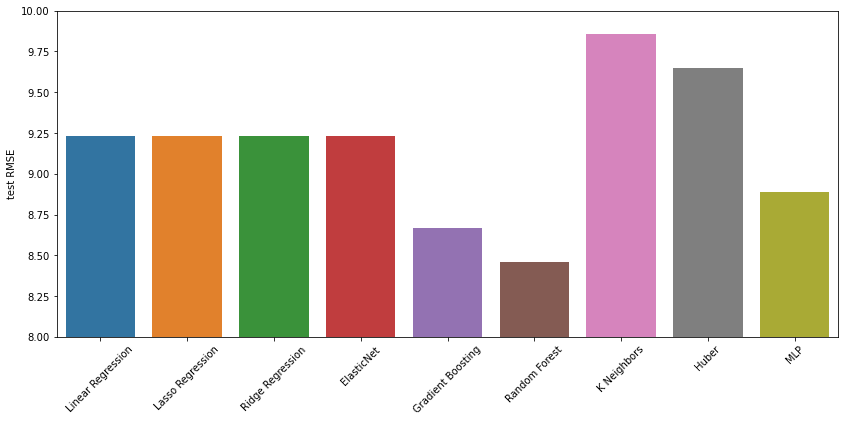

In [32]:
sns.barplot(x=RMSE_table.index, y=RMSE_table['Testing']).figure.set_size_inches(14, 6)
plt.xticks(rotation=45)
plt.ylim((8,10))
plt.ylabel('test RMSE')

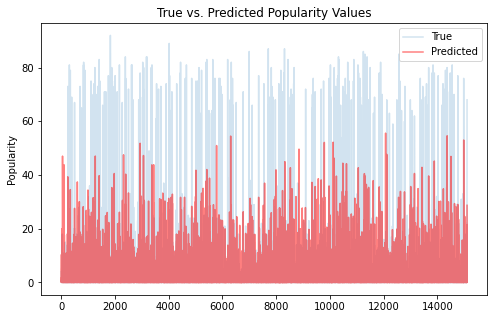

In [33]:
# True vs. Predicted values (Random Forest)
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("True vs. Predicted Popularity Values")
plt.plot(y_test, alpha=0.2, label="True")
plt.plot(RF.predict(X_test), alpha=0.5, c='r', label="Predicted")
plt.ylabel("Popularity")
plt.legend()
plt.show()

In [34]:
print("Total data size:", df.popularity.count())
print("popularity > 50:", df[df['popularity'] > 50].count()['popularity'])
print("popularity < 10:", df[df['popularity'] < 10].count()['popularity'])

Total data size: 45770
popularity > 50: 719
popularity < 10: 43511


# Model Enhancements:

Text(0, 0.5, 'test RMSE')

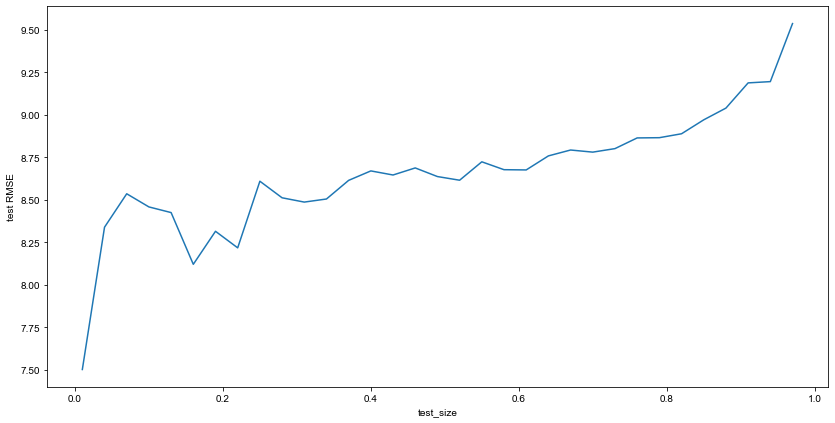

In [35]:
# Find the best train_test_split proportions (Random Forest)
test_size_lst = []
test_RMSE_lst = []
dict_test_size = {"test_size": test_size_lst, "test RMSE": test_RMSE_lst}

for size in np.arange(0.01, 0.99, 0.03):
  test_size_lst.append(size)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
  RF = RandomForestRegressor()
  RF.fit(X_train, y_train)
  RF_test_MSE = mean_squared_error(y_test, RF.predict(X_test))
  test_RMSE_lst.append(np.sqrt(RF_test_MSE))

RF_test_size = pd.DataFrame.from_dict(dict_test_size)
sns.lineplot(x='test_size', y='test RMSE', data=RF_test_size).figure.set_size_inches(14, 7)
sns.set_theme(context='notebook', style='whitegrid')
plt.xlabel('test_size')
plt.ylabel('test RMSE')

In [36]:
RF_test_size

,test_size,test RMSE
0,0.01,7.501407
1,0.04,8.338318
2,0.07,8.534868
3,0.10,8.457530
4,0.13,8.424304
5,0.16,8.120031
6,0.19,8.314253
7,0.22,8.216844
8,0.25,8.608696
9,0.28,8.511272


Text(0, 0.5, 'popularity(y)')

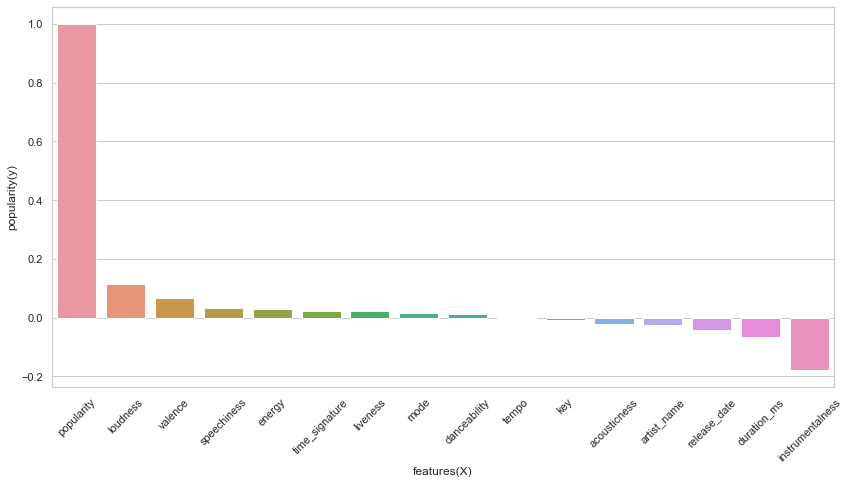

In [37]:
# Check the correlation between popularity(y) and features(X)
features = list(df.columns)
df_corr = df[features].corr()
corr = df_corr.loc['popularity'].sort_values(ascending=False)

sns.barplot(x=corr.index, y=corr).figure.set_size_inches(14, 7)
sns.set(style="whitegrid")
plt.xticks(rotation=45)
plt.xlabel('features(X)')
plt.ylabel('popularity(y)')

In [38]:
# Select the features with higher correlation
df_corr['popularity'].describe()

count    16.000000
mean      0.061057
std       0.258326
min      -0.178881
25%      -0.022603
50%       0.013823
75%       0.030235
max       1.000000
Name: popularity, dtype: float64

In [39]:
# Define the range of correlation we would like to select
std = 0.258326
positive_corr = 0.025
negative_corr = -0.025

features = list(df.columns)
df_corr = df[features].corr()
high_corr = []

# Pick the features which positive correlation > positive_corr
pos = df_corr[df_corr['popularity'] > positive_corr]['popularity'].index
# Pick the features which negative correlation < negative_corr
neg = df_corr[df_corr['popularity'] < negative_corr]['popularity'].index
for column in pos:
  high_corr.append(column)
for column in neg:
  high_corr.append(column)

df_higher_corr = df[high_corr]
df_higher_corr.head()

,popularity,energy,loudness,speechiness,valence,release_date,instrumentalness,duration_ms
0,22,0.188,-14.399,0.0381,0.0510,2011,0.000495,291640
1,39,0.648,-6.822,0.1760,0.9600,2016,0.046800,239174
2,5,0.404,-9.723,0.0313,0.0378,2017,0.068700,223343
3,32,0.549,-7.844,0.0642,0.7900,2010,0.000000,220147
4,7,0.106,-21.515,0.0655,0.2150,2013,0.000000,283747


In [40]:
# Re-train the models
X = df_higher_corr.drop(['popularity'], axis=1)
y = df_higher_corr[['popularity']]

# Normalization
X = (X - np.min(X))/(np.max(X)-np.min(X)).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)

In [41]:
RMSE_Enhanced_lst = []
# Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)
LR_train_MSE = mean_squared_error(y_train, LR.predict(X_train))
LR_test_MSE = mean_squared_error(y_test, LR.predict(X_test))
RMSE_Enhanced_lst.append([np.sqrt(LR_train_MSE), np.sqrt(LR_test_MSE)])
print("Linear Regression Training MSE:", LR_train_MSE)
print("Linear Regression Testing MSE:", LR_test_MSE)

X_train_scaled = preprocessing.scale(X_train, axis=0)
X_test_scaled = preprocessing.scale(X_test, axis=0)
alphas = 10**np.linspace(6,-6,100)
parameter_a = [{'alpha': alphas}]

# Lasso Regression
lassocv = GridSearchCV(Lasso(), parameter_a, cv=5)
lassocv.fit(X_train_scaled, y_train)
lasso_train_MSE = mean_squared_error(y_train, lassocv.predict(X_train_scaled))
lasso_test_MSE = mean_squared_error(y_test, lassocv.predict(X_test_scaled))
RMSE_Enhanced_lst.append([np.sqrt(lasso_train_MSE), np.sqrt(lasso_test_MSE)])
print("Lasso Regression Training MSE:", lasso_train_MSE)
print("Lasso Regression Testing MSE:", lasso_test_MSE)

# Ridge Regression
ridgecv = GridSearchCV(Ridge(), parameter_a, cv=5, refit=True)
ridgecv.fit(X_train_scaled, y_train)
ridge_train_MSE = mean_squared_error(y_train, ridgecv.predict(X_train_scaled))
ridge_test_MSE = mean_squared_error(y_test, ridgecv.predict(X_test_scaled))
RMSE_Enhanced_lst.append([np.sqrt(ridge_train_MSE), np.sqrt(ridge_test_MSE)])
print("Ridge Regression Training MSE:", ridge_train_MSE)
print("Ridge Regression Testing MSE:", ridge_test_MSE)

# Elastic Net
elasticnetcv = GridSearchCV(ElasticNet(), parameter_a, cv=5, refit=True)
elasticnetcv.fit(X_train_scaled, y_train)
elasticnet_train_MSE = mean_squared_error(y_train, elasticnetcv.predict(X_train_scaled))
elasticnet_test_MSE = mean_squared_error(y_test, elasticnetcv.predict(X_test_scaled))
RMSE_Enhanced_lst.append([np.sqrt(elasticnet_train_MSE), np.sqrt(elasticnet_test_MSE)])
print("ElasticNet Regression Training MSE:", elasticnet_train_MSE)
print("ElasticNet Regression Testing MSE:", elasticnet_test_MSE)

# Gradient Boosting
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
GB_train_MSE = mean_squared_error(y_train, GB.predict(X_train))
GB_test_MSE = mean_squared_error(y_test, GB.predict(X_test))
RMSE_Enhanced_lst.append([np.sqrt(GB_train_MSE), np.sqrt(GB_test_MSE)])
print("Gradient Boosting Training MSE:", GB_train_MSE)
print("Gradient Boosting Testing MSE:", GB_test_MSE)

# Random Forest
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
RF_train_MSE = mean_squared_error(y_train, RF.predict(X_train))
RF_test_MSE = mean_squared_error(y_test, RF.predict(X_test))
RMSE_Enhanced_lst.append([np.sqrt(RF_train_MSE), np.sqrt(RF_test_MSE)])
print("Random Forest Training MSE:", RF_train_MSE)
print("Random Forest Testing MSE:", RF_test_MSE)

# K Neighbors
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)
neigh_train_MSE = mean_squared_error(y_train, neigh.predict(X_train))
neigh_test_MSE = mean_squared_error(y_test, neigh.predict(X_test))
RMSE_Enhanced_lst.append([np.sqrt(neigh_train_MSE), np.sqrt(neigh_test_MSE)])
print("K Neighbors Training MSE:", neigh_train_MSE)
print("K Neighbors Testing MSE:", neigh_test_MSE)

# Huber
huber = HuberRegressor()
huber.fit(X_train, y_train)
huber_train_MSE = mean_squared_error(y_train, huber.predict(X_train))
huber_test_MSE = mean_squared_error(y_test, huber.predict(X_test))
RMSE_Enhanced_lst.append([np.sqrt(huber_train_MSE), np.sqrt(huber_test_MSE)])
print("Huber Training MSE:", huber_train_MSE)
print("Huber Testing MSE:", huber_test_MSE)

# MLP
MLP = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
MLP_train_MSE = mean_squared_error(y_train, MLP.predict(X_train))
MLP_test_MSE = mean_squared_error(y_test, MLP.predict(X_test))
RMSE_Enhanced_lst.append([np.sqrt(MLP_train_MSE), np.sqrt(MLP_test_MSE)])
print("MLP Training MSE:", MLP_train_MSE)
print("MLP Testing MSE:", MLP_test_MSE)

RMSE_Enhanced_table = pd.DataFrame(RMSE_Enhanced_lst, columns=['Training', 'Testing'])
RMSE_Enhanced_table = RMSE_Enhanced_table.rename(index={
    0: 'Linear Regression', 
    1: 'Lasso Regression', 
    2: 'Ridge Regression', 
    3: 'ElasticNet', 
    4: 'Gradient Boosting', 
    5: 'Random Forest',  
    6: 'K Neighbors', 
    7: 'Huber',
    8: 'MLP'
    })
RMSE_Enhanced_table

Linear Regression Training MSE: 91.99836632330171
Linear Regression Testing MSE: 80.53813878625907
Lasso Regression Training MSE: 91.99845329900796
Lasso Regression Testing MSE: 80.54137514098252
Ridge Regression Training MSE: 91.9984327441222
Ridge Regression Testing MSE: 80.54093606635294
ElasticNet Regression Training MSE: 91.99848427590737
ElasticNet Regression Testing MSE: 80.54083488237876


/Users/ming-hunghung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Gradient Boosting Training MSE: 77.0083369475089
Gradient Boosting Testing MSE: 73.07463135156664


/var/folders/j4/023w2zkd3dq2l2d21j0nqt300000gn/T/ipykernel_9599/2693464508.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)


Random Forest Training MSE: 11.039782738978047
Random Forest Testing MSE: 71.10595947259158
K Neighbors Training MSE: 64.09023770038695
K Neighbors Testing MSE: 88.92109497493895


/Users/ming-hunghung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Huber Training MSE: 100.5929076611487
Huber Testing MSE: 87.61855728780907


/Users/ming-hunghung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLP Training MSE: 81.59533501406433
MLP Testing MSE: 72.94516432769447


,Training,Testing
Linear Regression,9.591578,8.974304
Lasso Regression,9.591582,8.974485
Ridge Regression,9.591581,8.974460
ElasticNet,9.591584,8.974455
Gradient Boosting,8.775439,8.548370
Random Forest,3.322617,8.432435
K Neighbors,8.005638,9.429798
Huber,10.029602,9.360478
MLP,9.033014,8.540794


Text(0, 0.5, 'test RMSE')

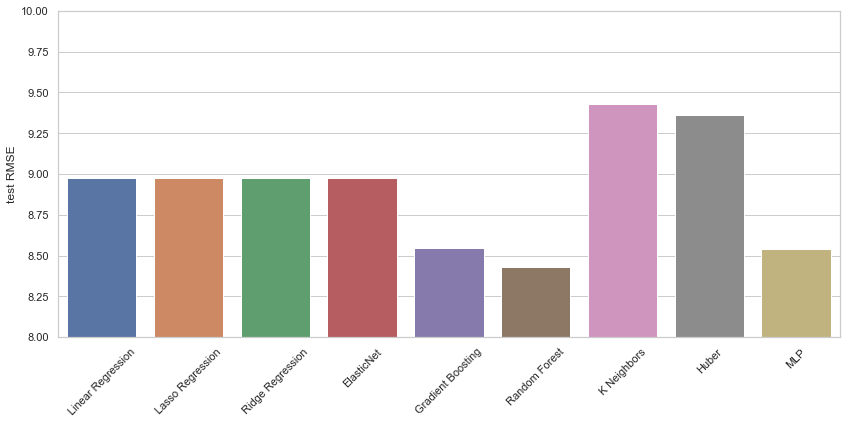

In [42]:
sns.barplot(x=RMSE_Enhanced_table.index, y=RMSE_Enhanced_table['Testing']).figure.set_size_inches(14, 6)
plt.xticks(rotation=45)
plt.ylim((8,10))
plt.ylabel('test RMSE')

In [43]:
Enhanced = (RMSE_table['Testing'] - RMSE_Enhanced_table['Testing'])/RMSE_table['Testing']*100